"Статистические данные о занятости и безработице среди населения по возрастным группам". Источник: Росстат; обработка: Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2020. (Ссылка на набор
                            данных: http://data-in.ru/data-catalog/datasets/156/)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    fig, ax = plt.subplots(figsize=(15,10))

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    #colors = ['paleturquoise', 'aquamarine', 'turquoise', 'lightseagreen', 'teal', 'darkslategray']
    colors = ['r','g','b','y','c','m']
    y_max = 0
    for i in range(len(y_data.columns)):
      if (y_data[y_data.columns[i]].max() > y_max):
        y_max = y_data[y_data.columns[i]].max()
      ax.plot(x_data, y_data[y_data.columns[i]], lw = 3, color = colors[i], alpha = 1, label = y_data.columns[i])

    # Add additional info
    #ax.vlines(2008, 0, y_max, color = 'lightgray', linewidth = 3, linestyle = ':')
    #ax.vlines(2012, 0, y_max, color = 'lightgray', linewidth = 3, linestyle = ':')
    ax.add_patch(patches.Rectangle(
        (2007, 0),
        2,
        y_max,
        facecolor = 'whitesmoke',
        fill=True
        ))
    ax.add_patch(patches.Rectangle(
        (2012, 0),
        1,
        y_max,
        facecolor = 'whitesmoke',
        fill=True
        ))
    
    # Adjust the step of the coordinate axis
    plt.xticks(np.arange(x_data.min(),x_data.max(),1))

    # Label the axes and provide a title & legend
    ax.legend(bbox_to_anchor=(1, 0.6))
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [ ]:
data = pd.read_csv("data.csv")
data.head()

,territory,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,dis_unagegroup_to20,dis_unagegroup_20-29,dis_unagegroup_30-39,dis_unagegroup_40-49,dis_unagegroup_50-59,dis_unagegroup_60older,dis_emagegroup_to20,dis_emagegroup_20-29,dis_emagegroup_30-39,dis_emagegroup_40-49,dis_emagegroup_50-59,dis_emagegroup_60older,num_unagegroup_to20,num_unagegroup_20-29,num_unagegroup_30-39,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,num_emagegroup_to20,num_emagegroup_20-29,num_emagegroup_30-39,num_emagegroup_40-49,num_emagegroup_50-59,num_emagegroup_60older,year
0,Российская Федерация,70816.1,64400.1,6416.0,64.2,58.4,9.1,8.2,30.7,24.8,24.2,9.7,2.4,2.2,21.8,26.5,30.7,14.6,4.4,526.1,1969.7,1591.2,1552.7,622.4,154.0,1416.8,14039.2,17066.0,19770.8,9402.4,2833.6,2001
1,Центральный федеральный округ,18337.9,17181.9,1156.0,64.6,60.5,6.3,7.9,29.8,24.6,24.4,10.4,2.9,1.7,20.1,25.9,30.6,16.2,5.5,91.3,344.5,284.4,282.1,120.2,33.5,292.1,3453.6,4450.1,5257.7,2783.5,945.0,2001
2,Белгородская область,737.9,689.6,48.3,65.4,61.1,6.5,6.0,43.4,17.2,19.4,8.9,5.0,1.9,21.5,27.1,30.4,12.4,6.7,2.9,21.0,8.3,9.4,4.3,2.4,13.1,148.3,186.9,209.6,85.5,46.2,2001
3,Брянская область,653.5,588.1,65.3,61.0,54.9,10.0,5.9,33.3,28.0,23.6,8.2,1.0,2.8,23.1,27.1,30.7,12.4,3.9,3.9,21.7,18.3,15.4,5.4,0.7,16.5,135.9,159.4,180.5,72.9,22.9,2001
4,Владимирская область,808.9,728.4,80.5,65.4,58.9,9.9,13.2,32.4,21.4,25.0,5.0,3.1,2.3,21.6,25.7,30.4,15.4,4.6,10.6,26.1,17.2,20.1,4.0,2.5,16.8,157.3,187.2,221.4,112.2,33.5,2001


Выберем строки, относящиеся к Российской Федерации

In [ ]:
data_rf = data[data['territory'] == 'Российская Федерация']
data_rf.head()

,territory,num_economactivepopulation_all,employed_num_all,unemployed_num_all,eactivity_lvl,employment_lvl,unemployment_lvl,dis_unagegroup_to20,dis_unagegroup_20-29,dis_unagegroup_30-39,dis_unagegroup_40-49,dis_unagegroup_50-59,dis_unagegroup_60older,dis_emagegroup_to20,dis_emagegroup_20-29,dis_emagegroup_30-39,dis_emagegroup_40-49,dis_emagegroup_50-59,dis_emagegroup_60older,num_unagegroup_to20,num_unagegroup_20-29,num_unagegroup_30-39,num_unagegroup_40-49,num_unagegroup_50-59,num_unagegroup_60older,num_emagegroup_to20,num_emagegroup_20-29,num_emagegroup_30-39,num_emagegroup_40-49,num_emagegroup_50-59,num_emagegroup_60older,year
0,Российская Федерация,70816.1,64400.1,6416.0,64.2,58.4,9.1,8.2,30.7,24.8,24.2,9.7,2.4,2.2,21.8,26.5,30.7,14.6,4.4,526.1,1969.7,1591.2,1552.7,622.4,154.0,1416.8,14039.2,17066.0,19770.8,9402.4,2833.6,2001
91,Российская Федерация,72949.6,67274.7,5674.8,65.3,60.3,7.8,9.7,31.4,21.9,23.3,11.3,2.4,2.2,22.1,24.4,30.0,17.0,4.3,550.5,1781.9,1242.8,1322.2,641.3,136.2,1480.0,14867.7,16415.0,20182.4,11436.7,2892.8,2004
182,Российская Федерация,75159.0,70570.5,4588.5,67.1,63.0,6.1,9.4,33.8,20.8,22.2,12.3,1.4,1.8,22.8,24.1,27.8,19.9,3.6,431.3,1550.9,954.4,1018.6,564.4,64.2,1270.3,16090.1,17007.5,19618.6,14043.5,2540.5,2007
273,Российская Федерация,75657.7,69284.9,6372.8,67.8,62.1,8.4,6.5,35.9,20.8,19.8,14.9,2.0,1.3,23.2,24.5,26.4,20.6,4.0,414.2,2287.8,1325.5,1261.8,949.5,127.5,900.7,16074.1,16974.8,18291.2,14272.7,2771.4,2009
364,Российская Федерация,75676.1,71545.4,4130.7,68.7,64.9,5.5,4.8,38.3,21.9,17.0,15.7,2.3,0.7,22.6,26.0,23.9,22.1,4.6,198.3,1582.1,904.6,702.2,648.5,95.0,500.8,16169.3,18601.8,17099.4,15811.5,3291.1,2012


Безработный

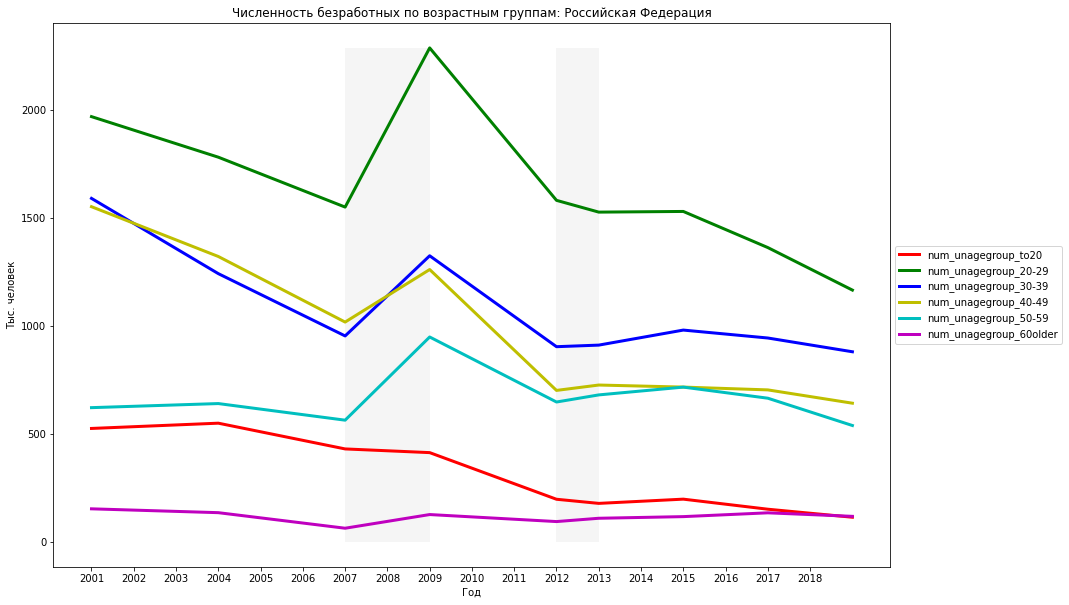

In [ ]:
lineplot(data_rf['year'], data_rf.loc[:, 'num_unagegroup_to20':'num_unagegroup_60older'], x_label="Год", y_label="Тыс. человек", title="Численность безработных по возрастным группам: Российская Федерация")

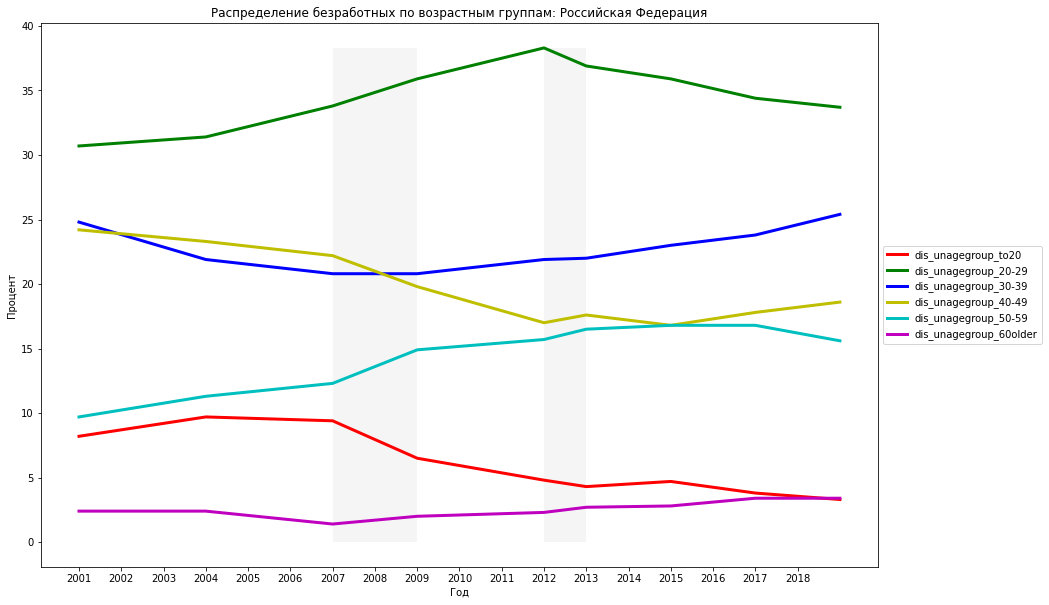

In [ ]:
lineplot(data_rf['year'], data_rf.loc[:, 'dis_unagegroup_to20':'dis_unagegroup_60older'], x_label="Год", y_label="Процент", title="Распределение безработных по возрастным группам: Российская Федерация")

Занятые в экономике

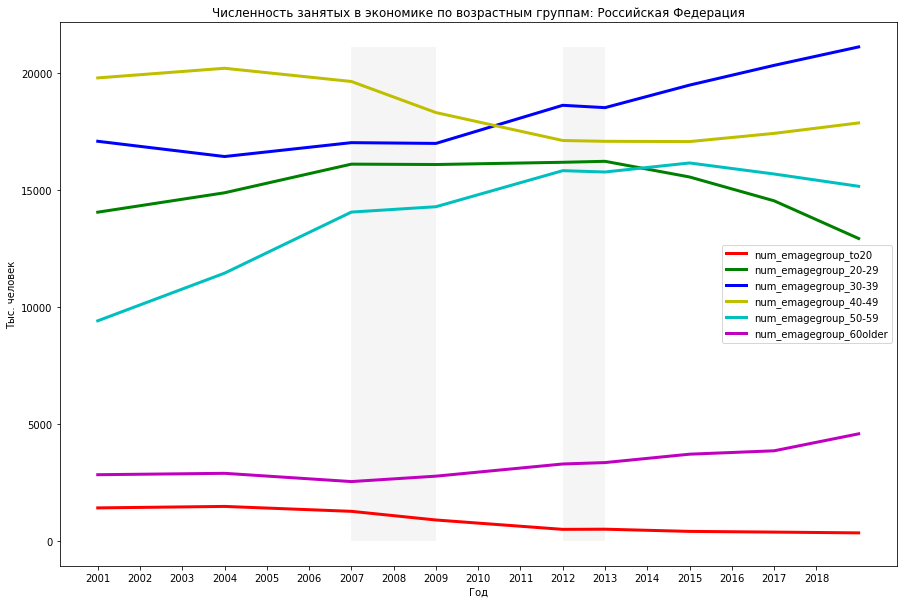

In [ ]:
lineplot(data_rf['year'], data_rf.loc[:, 'num_emagegroup_to20':'num_emagegroup_60older'], x_label="Год", y_label="Тыс. человек", title="Численность занятых в экономике по возрастным группам: Российская Федерация")

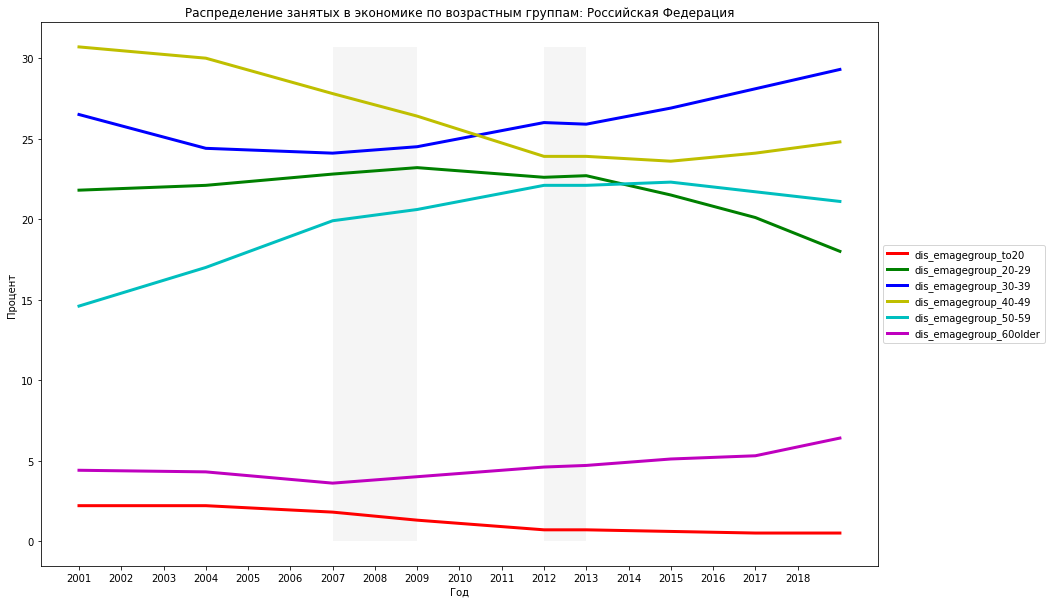

In [ ]:
lineplot(data_rf['year'], data_rf.loc[:, 'dis_emagegroup_to20':'dis_emagegroup_60older'], x_label="Год", y_label="Процент", title="Распределение занятых в экономике по возрастным группам: Российская Федерация")